# Plot Structure Analysis

In [352]:
import nltk
import nltk.data
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

In [353]:
nltk.download(["names",
"stopwords",
"state_union",
"twitter_samples",
"movie_reviews",
"averaged_perceptron_tagger",
"vader_lexicon",
"punkt",])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [354]:
def moving_avarage(x, w):
  return np.convolve(x, np.ones(w)/w, mode='valid')/w

In [355]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sia = SentimentIntensityAnalyzer()

In [356]:
book = "../data/Ender's Game - Orson Scott Card.txt"
# book = "../data/Angels & Demons - Dan Brown.txt"
# book = "../data/The Martian - Andy Weir.txt"
# book = "../data/The Last Shadow -  Orson Scott Card.txt"
# book = "../data/Digital Fortress - Dan Brown.txt"
# book = "../data/Deception Point - Dan Brown.txt"
# book = "../data/The Maze Runner - James Dashner.txt"
# book = "../data/The Fever Code - James Dashner.txt"
# book = "../data/Critical Point - S L Huang.txt"
# book = "../data/Never Silly Sophie - Jessica Spencer.txt"

# book = "../data/Promise Me - Harlan Coben.txt"
# book = "../data/Critical Point - S L Huang.txt"
# book = "../data/The Way of Kings - Brandon Sanderson.txt"
# book = "../data/The Girl with the Dragon Tattoo - Stieg Larsson.txt"
# book = "../data/Recursion - Blake Crouch.txt"
# book = "../data/The Da Vinci Code - Dan Brown.txt"

# book = "../data/Eragon - Christopher Paolini.txt"
# book = "../data/Pirate Latitudes - Michael Crichton.txt"
# book = "../data/Ready Player One - Ernest Cline.txt"
# book = "../data/State of Fear - Michael Crichton.txt"
# book = "../data/The Bishop's Pawn - Steve Berry.txt"
# book = "../data/The Lincoln Myth - Steve Berry.txt"
# book = "../data/The Malta Exchange - Steve Berry.txt"
# book = "../data/The Singularity Trap - Dennis E. Taylor.txt"
# book = "../data/The Jefferson Key - Steve Berry.txt"


fb = open(book, "r", encoding="utf8")
raw = fb.read()

In [357]:
lines = tokenizer.tokenize(raw)
print(len(lines))
x = []
y = []
for idx, line in enumerate(lines):
  x.append(idx)
  y.append(sia.polarity_scores(line)['compound']*100)
y_ma = moving_avarage(y, 1000)

# book 2:
# y_ma = moving_avarage(y, 550)

7626


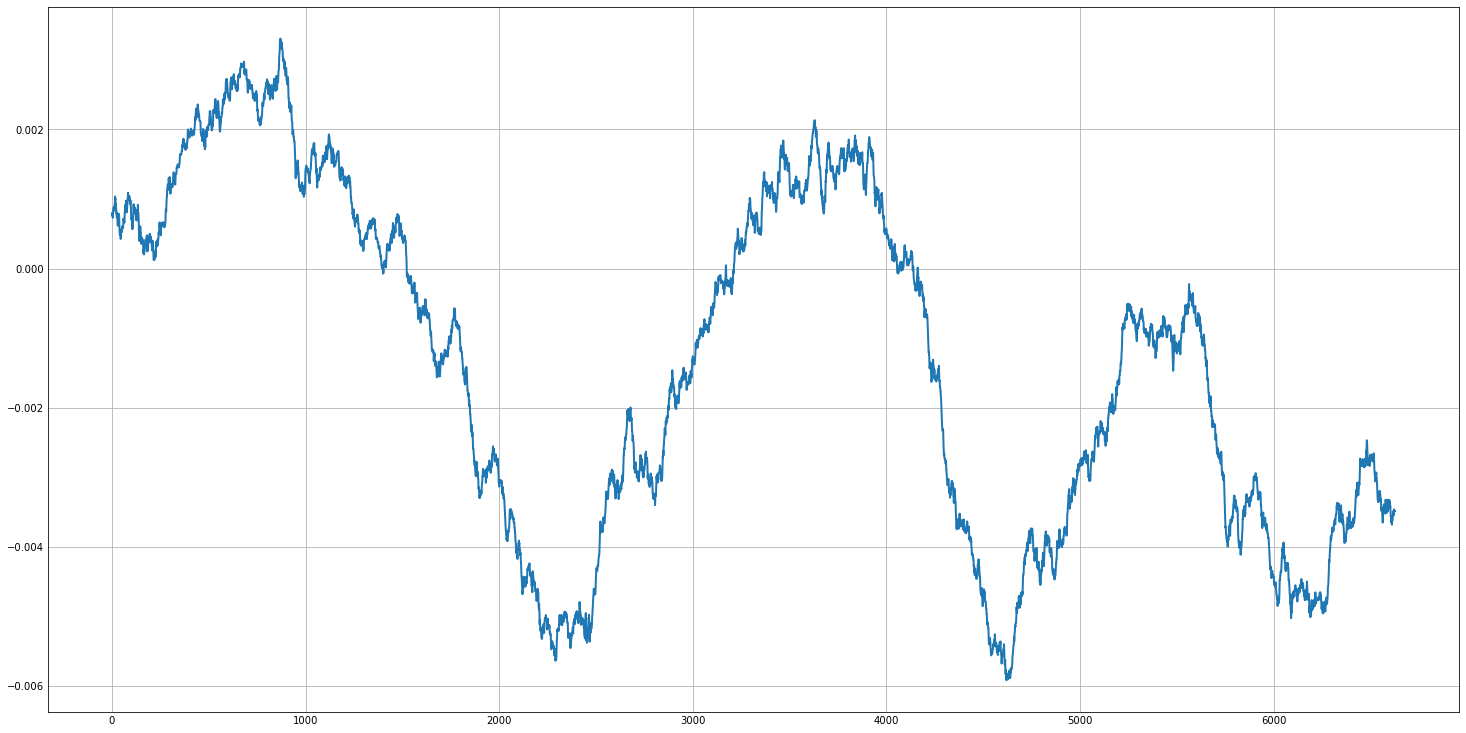

In [358]:

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x[:len(y_ma)], y_ma, linewidth=2.0)

plt.show()

### Smooth

In [359]:
from scipy.signal import savgol_filter


In [360]:
y_smooth = savgol_filter(y_ma, 51, 4)

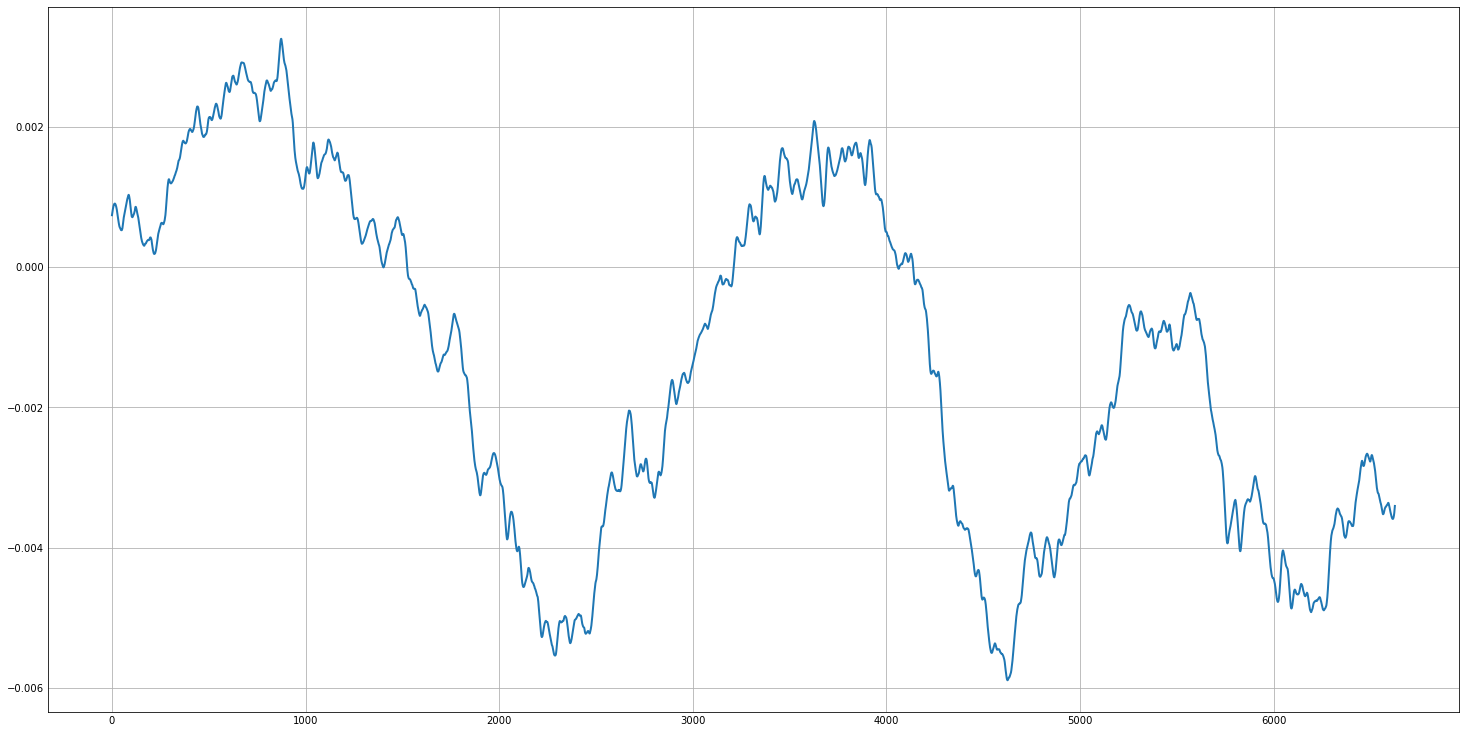

In [361]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(x[:len(y_ma)], y_smooth, linewidth=2.0)

plt.show()

### Prepare data to frontend chart

In [362]:
import math

In [363]:
y_norm = 100*(y_ma - min(y_ma))/(max(y_ma) - min(y_ma)) - 50
y_reduce = y_norm[::math.ceil(len(y_norm)/100)]
y_floored = [math.floor(e) for e in y_reduce]
len(y_floored)


99

In [364]:
y_floored
file = open(".tmp/output.txt", "w")
file.write('{' + ','.join(map(str, y_floored)) + '}')
file.close()

In [365]:
len(y_norm)/100

66.27

In [366]:
x_reduce = x[:100]

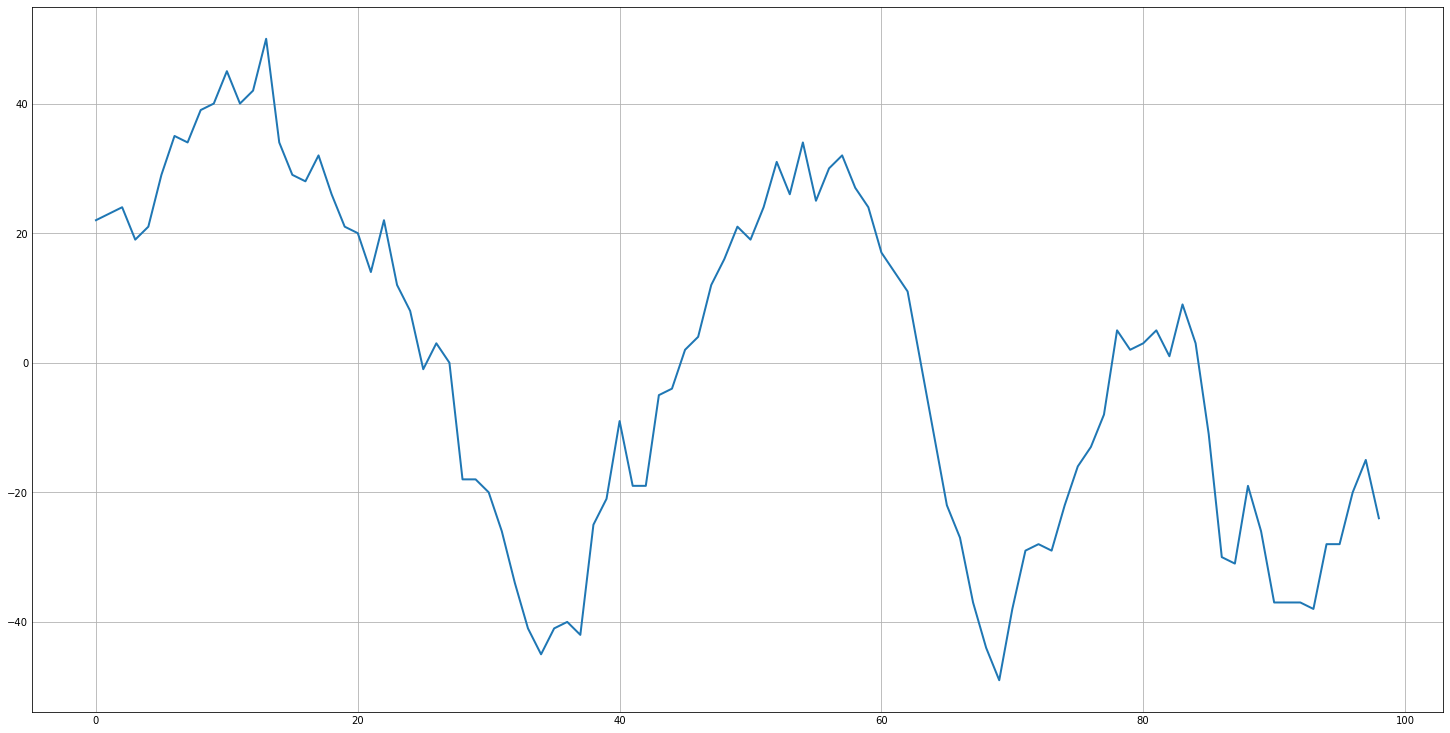

In [367]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x_reduce[:len(y_floored)], y_floored, linewidth=2.0)
plt.show()

In [368]:
len(y_floored)

99

In [369]:
y_reduce_smooth = savgol_filter(y_floored, 51, 4)

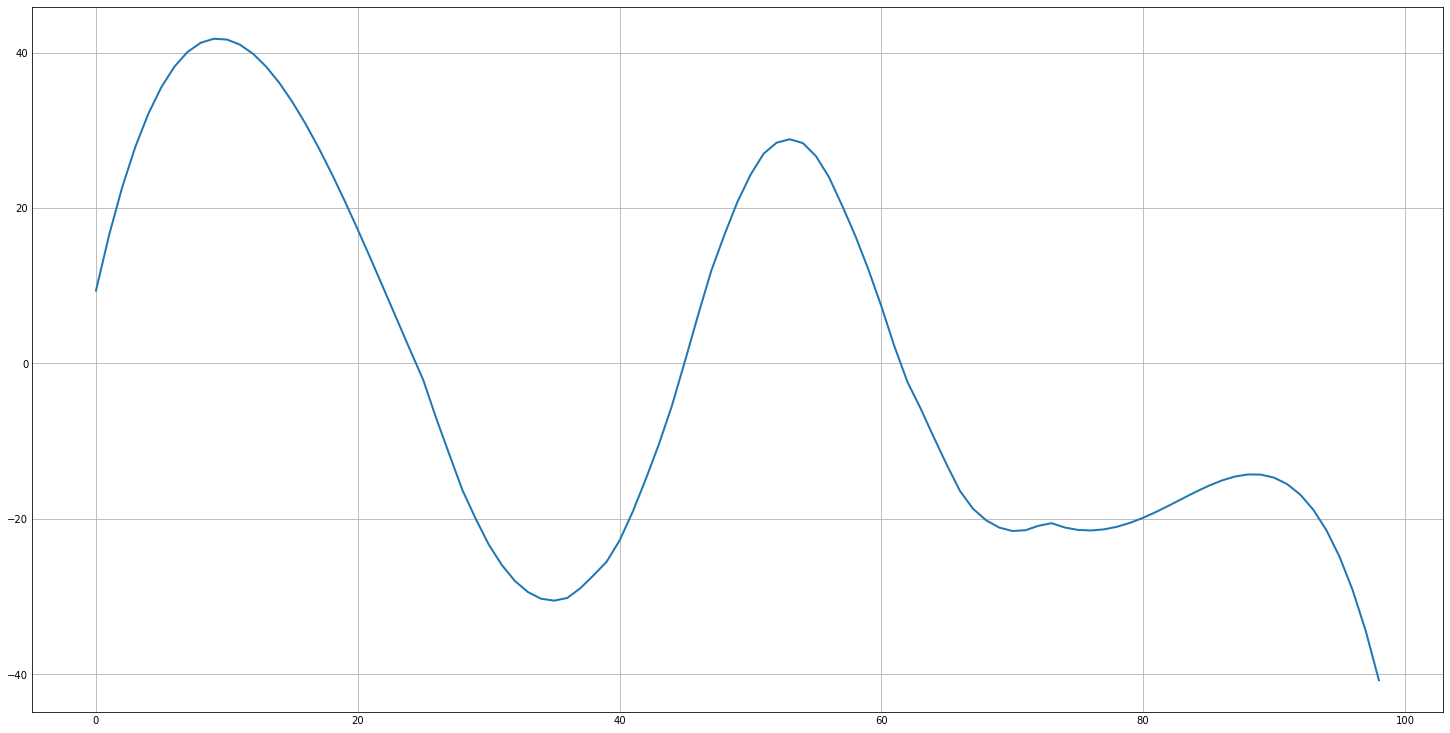

In [370]:
plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x_reduce[:len(y_reduce_smooth)], y_reduce_smooth, linewidth=2.0)
plt.show()

In [371]:
file = open(".tmp/output_s.txt", "w")
file.write('{' + ','.join(map(str, y_reduce_smooth)) + '}')
file.close()